# Investigation of Protest Patterns in MENA Region

In [133]:
# Imports for EDA

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
# read dataset
df = pd.read_csv('../dataverse_files/mmALL_073119_csv.csv')

In [135]:
df.shape

(16363, 31)

In [136]:
pd.set_option('display.max_columns',None)

In [137]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...


In [138]:
# some engineering for protest length by total days
# CAVEAT: the 'days' column may be imprecise when start and endmonths are not equal
# This feature must be understood as an approximate duration of individual days

df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']

df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

In [139]:
df['protesterdemand1'].value_counts().head(15)

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [140]:
df.groupby(['protesterdemand1','stateresponse1','protest']).count().head(25)

id  country  ccode  \
protesterdemand1            stateresponse1  protest                         
labor wage dispute          accomodation    1         205      205    205   
                            arrests         1          70       70     70   
                            beatings        1          23       23     23   
                            crowd dispersal 1         326      326    326   
                            ignore          1        1006     1006   1006   
                            killings        1           8        8      8   
                            shootings       1          23       23     23   
land farm issue             accomodation    1          49       49     49   
                            arrests         1          28       28     28   
                            beatings        1           6        6      6   
                            crowd dispersal 1         111      111    111   
                            ignore          1         234      234    234   
                            killings        1           7        7      7   
                            shootings       1          12       12     12   
police brutality            accomodation    1          51       51     51   
                            arrests         1          63       63     63   
                            beatings        1          35       35     35   
                            crowd dispersal 1         270      270    270   
                            ignore          1         296      296    296   
                            killings        1          20       20     20   
                            shootings       1          47       47     47   
political behavior, process accomodation    1         432      432    432   
                            arrests         1         704      704    704   
                            beatings        1         198      198    198   
                            crowd dispersal 1        2334     2334   2334   

                                                     year  region  \
protesterdemand1            stateresponse1  protest                 
labor wage dispute          accomodation    1         205     205   
                            arrests         1          70      70   
                            beatings        1          23      23   
                            crowd dispersal 1         326     326   
                            ignore          1        1006    1006   
                            killings        1           8       8   
                            shootings       1          23      23   
land farm issue             accomodation    1          49      49   
                            arrests         1          28      28   
                            beatings        1           6       6   
                            crowd dispersal 1         111     111   
                            ignore          1         234     234   
                            killings        1           7       7   
                            shootings       1          12      12   
police brutality            accomodation    1          51      51   
                            arrests         1          63      63   
                            beatings        1          35      35   
                            crowd dispersal 1         270     270   
                            ignore          1         296     296   
                            killings        1          20      20   
                            shootings       1          47      47   
political behavior, process accomodation    1         432     432   
                            arrests         1         704     704   
                            beatings        1         198     198   
                            crowd dispersal 1        2334    2334   

                                                     protestnumber  startday  \
protesterdemand1            sta

In [141]:
# Value Count feature investigations

df['stateresponse2'].value_counts()

arrests            692
crowd dispersal    568
accomodation       382
beatings           370
shootings          360
killings           311
ignore              33
Name: stateresponse2, dtype: int64

In [142]:
df['stateresponse3'].value_counts()

arrests            214
crowd dispersal    207
killings           175
accomodation        92
beatings            80
shootings           72
ignore              10
Name: stateresponse3, dtype: int64

In [143]:
df['stateresponse4'].value_counts()

accomodation       64
arrests            50
crowd dispersal    40
killings           38
beatings           19
shootings          19
Name: stateresponse4, dtype: int64

In [144]:
df['protesterdemand1'].value_counts()

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [145]:
df['protesterdemand2'].value_counts()

political behavior, process    973
removal of politician          603
labor wage dispute             417
price increases, tax policy    201
social restrictions            201
police brutality               181
land farm issue                100
Name: protesterdemand2, dtype: int64

In [146]:
df['protesterdemand3'].value_counts()

price increases, tax policy    111
labor wage dispute              60
removal of politician           56
political behavior, process     35
police brutality                28
social restrictions             14
land farm issue                 12
Name: protesterdemand3, dtype: int64

In [147]:
df['protesteridentity'].value_counts()

protesters                                     1300
students                                        490
unspecified                                     224
workers                                         223
farmers                                         187
                                               ... 
trade union members, electricity workers          1
indigenous Himba and Zemba communities            1
gay activists                                     1
workers, civil servants, police trade union       1
Banana Workers Union                              1
Name: protesteridentity, Length: 5808, dtype: int64

In [148]:
df['protesterviolence'].value_counts()

0.0    11217
1.0     3816
Name: protesterviolence, dtype: int64

In [149]:
df['stateresponse7'].value_counts()

.               913
accomodation      3
arrests           2
beatings          1
killings          1
Name: stateresponse7, dtype: int64

In [150]:
df.groupby(['stateresponse1','protesterdemand1'])['country'].count()

stateresponse1   protesterdemand1           
accomodation     labor wage dispute              205
                 land farm issue                  49
                 police brutality                 51
                 political behavior, process     432
                 price increases, tax policy      82
                 removal of politician            90
                 social restrictions              28
arrests          labor wage dispute               70
                 land farm issue                  28
                 police brutality                 63
                 political behavior, process     704
                 price increases, tax policy      98
                 removal of politician            57
                 social restrictions              27
beatings         labor wage dispute               23
                 land farm issue                   6
                 police brutality                 35
                 political behavior, process     198
 

In [151]:
# Investigate Nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [152]:
df[df['country'] == 'Cuba'].shape

(120, 35)

In [153]:
df.sort_values(by='protestnumber',ascending=False).groupby('country').count()

,id,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,55,55,55,55,55,55,38,38,38,38,38,38,54,38,26,54,31,38,7,0,7,38,5,0,0,7,0,5,38,38,38,38,38,38
Albania,82,82,82,82,82,82,67,67,67,67,67,67,67,67,67,67,67,67,12,0,18,67,26,2,0,18,0,1,67,67,67,67,67,67
Algeria,74,74,74,74,74,74,58,58,58,58,58,58,71,58,35,71,58,58,27,0,20,58,5,0,0,20,0,3,58,58,58,58,58,58
Angola,37,37,37,37,37,37,23,23,23,23,23,23,23,23,23,23,23,23,1,0,2,23,8,1,0,2,0,3,23,23,23,23,23,23
Argentina,116,116,116,116,116,116,112,112,112,112,112,112,113,112,19,113,84,112,6,0,7,111,24,5,0,7,0,5,112,112,112,112,112,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,35,35,35,35,35,35,19,19,19,19,19,19,31,19,4,31,19,19,6,2,2,19,9,1,0,2,0,1,19,18,19,19,19,19
Yemen,165,165,165,165,165,165,157,157,157,157,157,157,162,157,45,162,92,157,71,4,2,157,46,17,5,3,1,11,157,157,157,157,157,157
Yugoslavia,138,138,138,138,138,138,137,137,137,137,137,137,137,137,136,137,137,137,50,8,3,137,33,13,5,0,0,0,137,137,137,137,137,137


In [154]:
df.groupby(['country','protest'])['protestnumber'].sum()

country      protest
Afghanistan  0             0
             1           107
Albania      0             0
             1           265
Algeria      0             0
                        ... 
Yugoslavia   1          1328
Zambia       0             0
             1           309
Zimbabwe     0             0
             1           420
Name: protestnumber, Length: 321, dtype: int64

In [155]:
pd.DataFrame(df.groupby(['country','protest']).sum().sort_values(by='protestnumber',ascending=False)['protestnumber']).head(25).T

country,Kenya,Ireland,France,United Kingdom,Germany,Bangladesh,Ukraine,Greece,Romania,South Korea,Nigeria,Yemen,Venezuela,China,Cuba,Kyrgyzstan,Thailand,Namibia,Madagascar,Brazil,Nepal,Yugoslavia,Bulgaria,USSR,South Africa
protest,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
protestnumber,12662,7188,6984,6004,5421,4966,4330,3322,3295,3188,2578,2534,2314,2245,2143,2006,1783,1684,1439,1426,1353,1328,1263,1155,1066


In [156]:
# Early removal of features identified as not being relevant.

df.drop(columns=['id','sources','notes'],inplace=True)

In [157]:
# including start day for protest duration
df['total_days'] = df['total_days'] + 1

In [158]:
# create dummy columns with recognizable column names
# Exclusive credit to Jenn for this terrific solution.

protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
                   'stateresponse5', 'stateresponse6', 'stateresponse7']

def get_dum_cols(df, list_of_columns):
    list_of_dfs = []
    
    for col in list_of_columns:
        col_df = pd.get_dummies(df[col])
        list_of_dfs.append(col_df)
        
    #combine all df's vertically, so only areas with null values are where a potential column was empty    
    dfs_concat = pd.concat(list_of_dfs, axis = 0).fillna(0)
    
    #convert the concatenated df with all values now filled in into a list of separate dfs - each with all columns
    num_dfs = len(list_of_columns)
    num_rows = len(df)
    list_of_final_dfs = []
    
    for i in range(num_dfs):
        new_df = dfs_concat[num_rows*i : num_rows*(i+1)]
        list_of_final_dfs.append(new_df)
        
    # create combined final df
    final_df = list_of_final_dfs[0]
    
    for j in range(1, len(list_of_final_dfs)):
        final_df += list_of_final_dfs[j]
        
    return final_df

In [159]:
# Utilize encoding function
response_cats = get_dum_cols(df,state_responses)
demand_cats = get_dum_cols(df,protest_demands)

# combine newwly encoded features
df = pd.concat([df,demand_cats,response_cats],axis=1)

# Remove rows that did not have any protest observations
df = df[df['protest'] == 1].copy()

In [160]:
# Early creation of MENA region specific DataFrame for EDA

mena_df = df[df['region'] == 'MENA'].copy()

In [161]:
# Checking for extremes
mena_df[df['years'] > 1]

/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,.,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings,.
11631,Morocco,600,2011,MENA,1,5,1.0,7.0,2011.0,24.0,1.0,2014.0,0.0,Imider,50-99,>50,"protesters, students, locals, women, villagers...","political behavior, process","price increases, tax policy",NaN,NaN,killings,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-6.0,23.0,936.0,0,0,0,1,1,0,0.0,0.0,0,0,0,0.0,0.0,1,0.0,0.0


In [162]:
mena_df[df['months'] > 1].sort_values(by='months',ascending=False).head(25)

/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,.,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings,.
12431,Syria,652,2011,MENA,1,3,18.0,3.0,2011.0,3.0,12.0,2012.0,1.0,National,NaN,10000s,NaN,"political behavior, process",removal of politician,police brutality,NaN,killings,shootings,beatings,crowd dispersal,arrests,accomodation,NaN,1.0,9.0,-15.0,625.5,0,0,1,1,0,1,0.0,0.0,1,1,1,1.0,0.0,1,1.0,0.0
12313,Egypt,651,2010,MENA,1,1,1.0,2.0,2010.0,28.0,6.0,2010.0,0.0,Cairo,NaN,10000,labor,labor wage dispute,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.0,27.0,150.0,1,0,0,0,0,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0.0
11643,Morocco,600,2017,MENA,1,2,29.0,5.0,2017.0,27.0,8.0,2017.0,1.0,al Hoceima,100-999,100,Hirak Chaabi,police brutality,NaN,NaN,NaN,arrests,crowd dispersal,NaN,NaN,NaN,NaN,NaN,0.0,3.0,-2.0,90.5,0,0,1,0,0,0,0.0,0.0,0,1,0,1.0,0.0,0,0.0,0.0
11773,Tunisia,616,2017,MENA,1,2,14.0,3.0,2017.0,28.0,5.0,2017.0,1.0,El Kamour,5000-10000,thousands,youth,"political behavior, process",NaN,NaN,NaN,crowd dispersal,beatings,NaN,NaN,NaN,NaN,NaN,0.0,2.0,14.0,76.0,0,0,0,1,0,0,0.0,0.0,0,0,1,1.0,0.0,0,0.0,0.0
12152,Turkey,640,2018,MENA,1,17,21.0,7.0,2018.0,30.0,9.0,2018.0,0.0,Istanbul,50-99,50,residents,land farm issue,NaN,NaN,.,ignore,NaN,NaN,NaN,.,NaN,NaN,0.0,2.0,9.0,71.0,0,1,0,0,0,0,0.0,1.0,0,0,0,0.0,1.0,0,0.0,1.0
12757,Yemen,679,2014,MENA,1,19,18.0,8.0,2014.0,15.0,10.0,2014.0,1.0,"Sana a, several governorates",>10000,100000,"Houthis, some soldiers, Houthis? Protest Orga...",removal of politician,"political behavior, process","price increases, tax policy",NaN,crowd dispersal,accomodation,crowd dispersal,shootings,killings,accomodation,NaN,0.0,2.0,-3.0,59.0,0,0,0,1,1,1,0.0,0.0,2,0,0,2.0,0.0,1,1.0,0.0
12794,Kuwait,690,1999,MENA,1,1,30.0,9.0,1999.0,1.0,11.0,1999.0,1.0,20 kilometres 12 miles south of Kuwait City,NaN,1000,Egyptian and Bangladeshi workers,social restrictions,NaN,NaN,NaN,arrests,beatings,NaN,NaN,NaN,NaN,NaN,0.0,2.0,-29.0,33.0,0,0,0,0,0,0,1.0,0.0,0,1,1,0.0,0.0,0,0.0,0.0


## Chart Options for Slides & Analysis

Text(0.5, 1.0, 'MENA Totals of All Response Types')

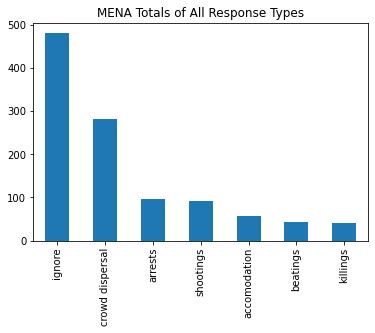

In [164]:
# Bar charts were particularly useful for ascending values grouped by different categories

mena_df['stateresponse1'].value_counts().plot.bar();
plt.title('MENA Totals of All Response Types - MENA')

Text(0.5, 1.0, 'Average Protest Duration by Country')

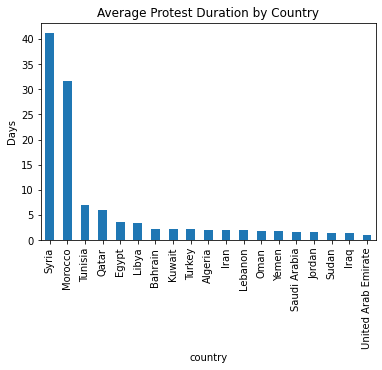

In [165]:
mena_df.groupby('country')['total_days'].mean().sort_values(ascending=False).head(20).plot.bar();
plt.ylabel('Days')
plt.title('Average Protest Duration by Country - MENA')

Text(0.5, 1.0, 'Average Protest Amount by Country')

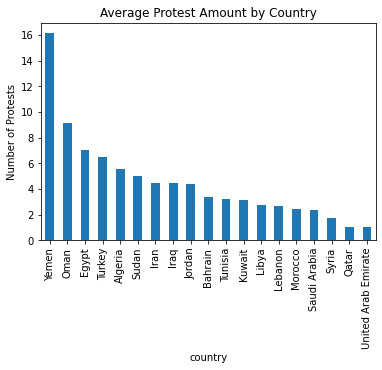

In [166]:
mena_df.groupby('country')['protestnumber'].mean().sort_values(ascending=False).head(20).plot.bar();
plt.ylabel('Number of Protests')
plt.title('Average Protest Amount by Country - MENA')

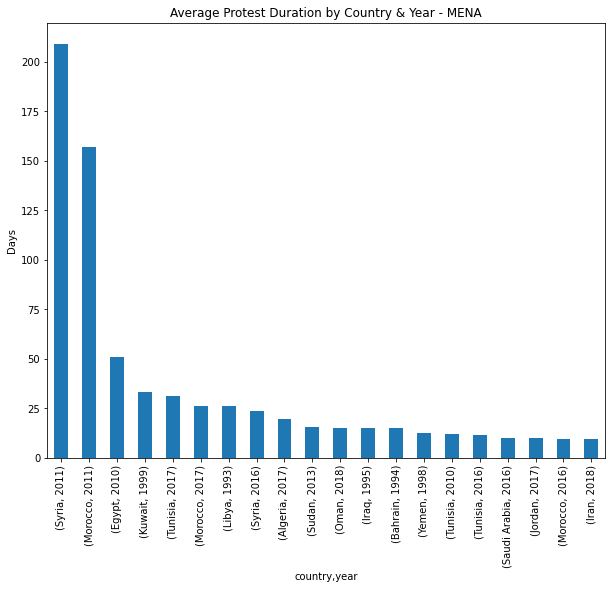

In [172]:
plt.figure(figsize=(10,8))
mena_df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.ylabel('Days')
plt.title('Average Protest Duration by Country & Year - MENA');

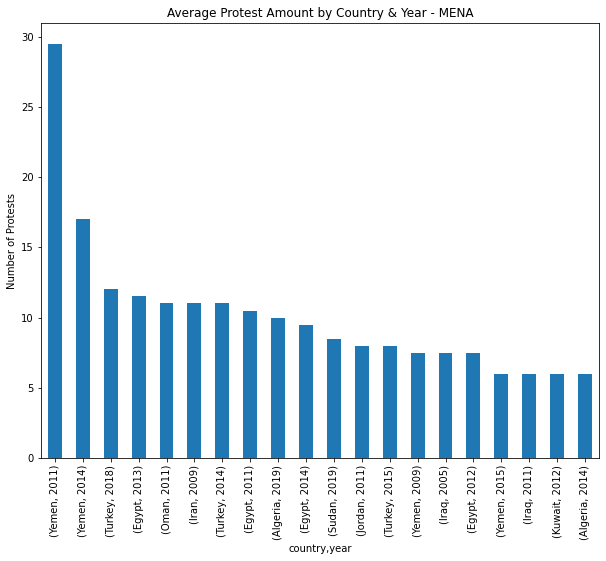

In [173]:
plt.figure(figsize=(10,8))
mena_df.groupby(['country','year'])['protestnumber'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.ylabel('Number of Protests')
plt.title('Average Protest Amount by Country & Year - MENA');

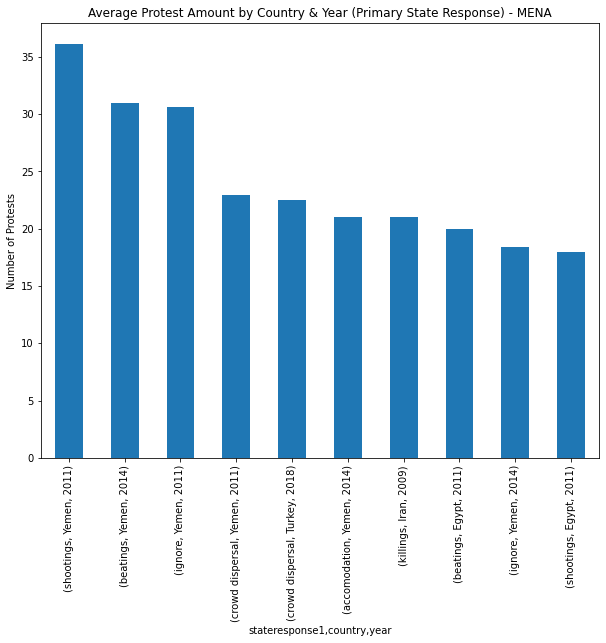

In [171]:
plt.figure(figsize=(10,8))
mena_df.groupby(['stateresponse1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Protests')
plt.title('Average Protest Amount by Country & Year (Primary State Response) - MENA');

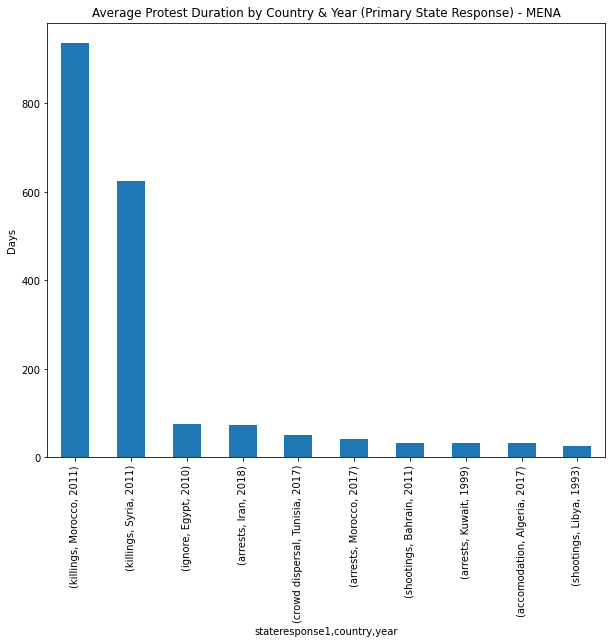

In [176]:
plt.figure(figsize=(10,8))
mena_df.groupby(['stateresponse1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Days')
plt.title('Average Protest Duration by Country & Year (Primary State Response) - MENA');

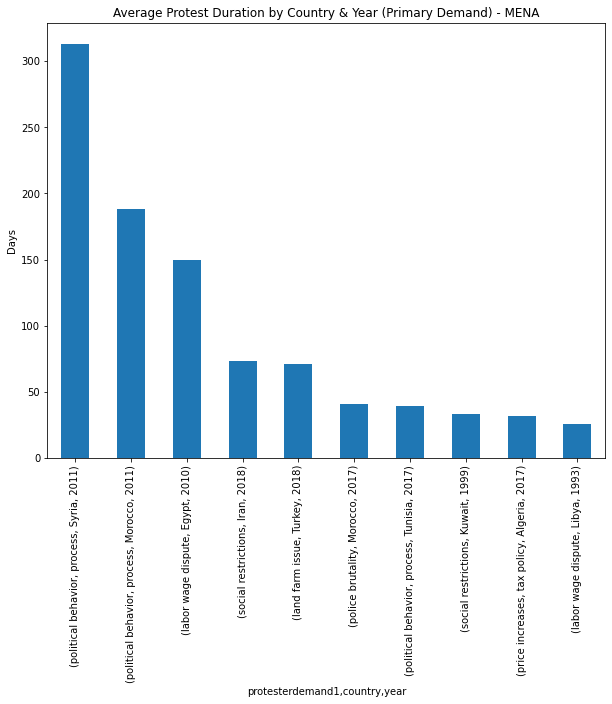

In [178]:
plt.figure(figsize=(10,8))
mena_df.groupby(['protesterdemand1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Days')
plt.title('Average Protest Duration by Country & Year (Primary Demand) - MENA');

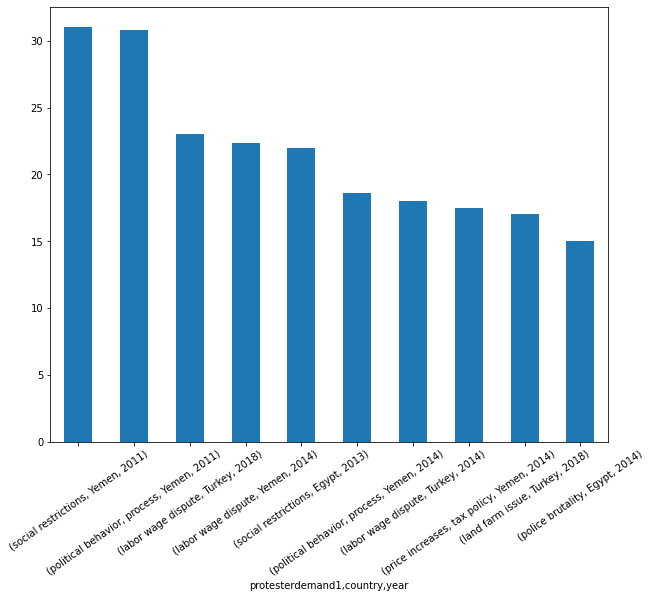

In [54]:
plt.figure(figsize=(10,8))
mena_df.groupby(['protesterdemand1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Protests')
plt.title('Average Protest Duration by Country & Year (Primary Demand) - MENA');

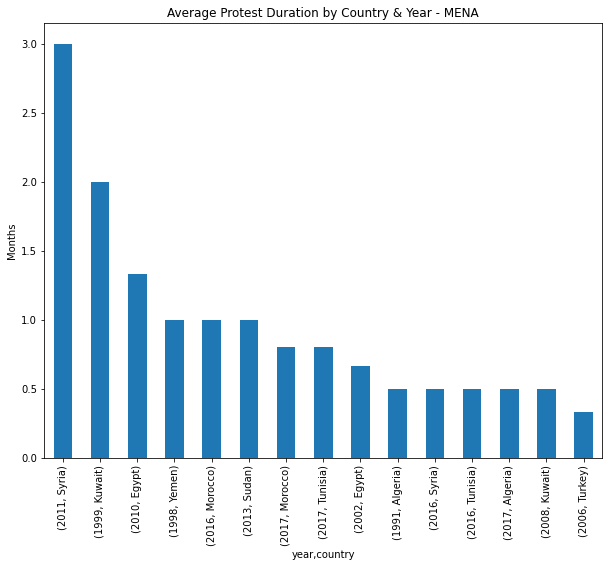

In [180]:
plt.figure(figsize=(10,8))
mena_df.groupby(['year','country'])['months'].mean().sort_values(ascending=False).head(15).plot.bar()
plt.ylabel('Months')
plt.title('Average Protest Duration by Country & Year - MENA');

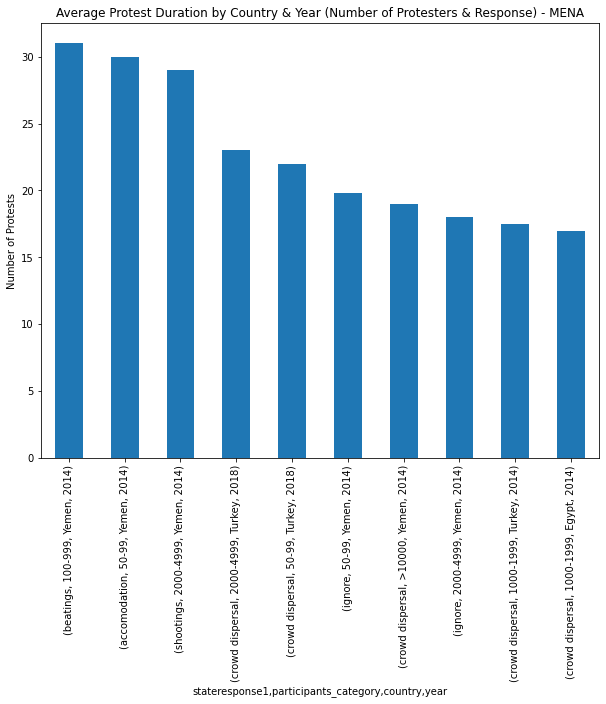

In [182]:
plt.figure(figsize=(10,8))
mena_df.groupby(['stateresponse1','participants_category','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Protests')
plt.title('Average Protest Duration by Country & Year (Number of Protesters & Response) - MENA');

In [179]:
# DataFrame format for largest protests by verage total days
pd.DataFrame(mena_df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(10))

,,total_days
country,year,
Syria,2011,209.166667
Morocco,2011,156.833333
Egypt,2010,50.666667
Kuwait,1999,33.000000
Tunisia,2017,31.400000
Morocco,2017,26.400000
Libya,1993,26.000000
Syria,2016,23.750000
Algeria,2017,19.750000


### Further investigation of Value Counts and Nulls

In [65]:
mena_df['stateresponse1'].value_counts()

ignore             481
crowd dispersal    283
arrests             96
shootings           92
accomodation        57
beatings            43
killings            41
Name: stateresponse1, dtype: int64

In [66]:
mena_df['participants_category'].value_counts()

50-99         136
100-999       118
2000-4999      64
>10000         33
5000-10000     14
1000-1999      13
Name: participants_category, dtype: int64

In [67]:
mena_df['protesterdemand4'].isnull().value_counts()

True     996
False    100
Name: protesterdemand4, dtype: int64

In [68]:
mena_df['participants_category'].isnull().value_counts()

True     718
False    378
Name: participants_category, dtype: int64

In [69]:
mena_df['protesterdemand1'].isnull().value_counts()

False    1093
True        3
Name: protesterdemand1, dtype: int64

In [70]:
mena_df['protest'].isnull().value_counts()

False    1096
Name: protest, dtype: int64

In [71]:
mena_df['region'].value_counts()

MENA    1096
Name: region, dtype: int64

In [72]:
mena_df['ccode'].value_counts()

679    156
640    127
651    122
630    116
645    105
660     59
615     58
625     52
692     46
663     45
616     42
690     41
600     35
698     26
620     23
670     21
652     17
696      3
678      1
694      1
Name: ccode, dtype: int64

### Processing for Models

In [73]:
# Removing Final Null Values

df.fillna(0,inplace=True)

In [75]:
df['region'].value_counts()

Europe             4811
Africa             3043
Asia               2987
South America      1602
MENA               1096
North America       500
Central America     437
Oceania              38
Name: region, dtype: int64

In [76]:
# df['outcome'] = df['stateresponse1'].apply(lambda x: 1 if x == 'accomodation' else int(0))
# df['outcome'] = df['accomodation'].apply(lambda x: 1 if x == 1 else int(0))

# Binarizing combined Target feature 'accomodation'

df['accomodation'] = np.where(df['accomodation'] > 0,1,0)
df['accomodation'].value_counts()

0    13022
1     1492
Name: accomodation, dtype: int64

In [77]:
# separate DFs by region
# AH to consider asia and MENA

euro_df = df[df['region'] == 'Europe'].copy()
asia_df = df[df['region'] == 'Asia'].copy()
africa_df = df[df['region'] == 'Africa'].copy()
sa_df = df[df['region'] == 'South America'].copy()
mena_df = df[df['region'] == 'MENA'].copy()
na_df = df[df['region'] == 'North America'].copy()
ca_df = df[df['region'] == 'Central America'].copy()
oc_df = df[df['region'] == 'Oceania'].copy()

In [78]:
# Checking distribution of classes
mena_df['accomodation'].value_counts()

0    1006
1      90
Name: accomodation, dtype: int64

In [80]:
# Features for Encoding and Removal

remove_features = ['ccode','startyear','endyear','startday',
                   'endday','protest','years','months','days',
                  'participants','protesteridentity','location',
                   'country','endmonth','stateresponse1',
                   'stateresponse2','stateresponse3','stateresponse4',
                   'stateresponse5','stateresponse6','stateresponse7',
                  'protesterdemand1','protesterdemand2',
                'protesterdemand3','protesterdemand4']

dummy_columns = ['region','startmonth','participants_category','year']

# dummy_columns = ['region','participants_category',
#                  'protesterdemand1','protesterdemand2',
#                 'protesterdemand3','protesterdemand4']

In [81]:
df['participants_category'].value_counts()

0             5354
100-999       3011
50-99         2387
2000-4999     1485
>10000        1250
5000-10000     563
1000-1999      464
Name: participants_category, dtype: int64

In [84]:
# new dataframes from original DF. Feature removal & encoding 

model_simple = df.drop(columns=remove_features)
asia_df = asia_df.drop(columns=remove_features)
mena_df = mena_df.drop(columns=remove_features)

model_simple = pd.get_dummies(model_simple,columns=dummy_columns)
asia_df = pd.get_dummies(asia_df,columns=dummy_columns)
mena_df = pd.get_dummies(mena_df,columns=dummy_columns)

# Removing final null values for target column
model_simple.dropna(inplace=True)
asia_df.dropna(inplace=True)
mena_df.dropna(inplace=True)
df.dropna(inplace=True)

In [86]:
model_simple['accomodation'].value_counts()

0    13022
1     1492
Name: accomodation, dtype: int64

In [89]:
model_simple.isnull().sum()

protestnumber         0
protesterviolence     0
total_days            0
labor wage dispute    0
land farm issue       0
                     ..
year_2015             0
year_2016             0
year_2017             0
year_2018             0
year_2019             0
Length: 76, dtype: int64

In [90]:
model_simple.shape

(14514, 76)

In [91]:
model_simple.dropna().shape

(14514, 76)

In [93]:
# Comparision of Feature counts for different DataFrames
mena_df.shape, asia_df.shape, africa_df.shape, euro_df.shape, sa_df.shape, na_df.shape, oc_df.shape

((1096, 69),
 (2987, 69),
 (3043, 48),
 (4811, 48),
 (1602, 48),
 (500, 48),
 (38, 48))

## Modeling: Train & Test Scores Presented Before Metrics

In [94]:
# Import inventory for models & metrics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix, roc_auc_score, plot_roc_curve 
from sklearn.metrics import recall_score, precision_score, f1_score 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [95]:
X = mena_df.drop(columns='accomodation')
y = mena_df['accomodation']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=77)

In [97]:
# Baseline verification
y.value_counts(normalize=True)

0    0.917883
1    0.082117
Name: accomodation, dtype: float64

In [183]:
# - Logistic Regression - PCA Applied for this model only

pipe_log = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',LogisticRegression())
])
log_params = {'pc__n_components':[10,15,20],
              'model__max_iter': [500, 1000],
              'model__C': [.1, .3, .5, 1],
              'model__solver': ['liblinear', 'lbfgs', 'sag'],
              'model__penalty': ['l2']}

logreg = GridSearchCV(pipe_log,
                     log_params,
                     cv=5,
                     verbose=1)

logreg.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    5.5s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 0.3, 0.5, 1],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},
             verbose=1)

In [184]:
logreg.score(X_train,y_train), logreg.score(X_test,y_test)

(0.9184914841849149, 0.916058394160584)

In [100]:
# Simple Decision Tree :)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
dtc.score(X_train,y_train), dtc.score(X_test,y_test)

(0.9987834549878345, 0.9306569343065694)

In [102]:
# KNN

knn_params = {'n_neighbors':[3,4,5,6],
             'weights':['uniform','distance'],
             'p':[2,3,4]}

knn = GridSearchCV(KNeighborsClassifier(),
                     knn_params,
                     cv=5,
                     verbose=1)

knn.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.6s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6], 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [103]:
knn.score(X_train,y_train), knn.score(X_test,y_test)

(0.9245742092457421, 0.9233576642335767)

In [104]:
# Random Forest

rfc_params = {'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2'],
             'oob_score':[True,False],
             'ccp_alpha':[0.01,0.05,0.07]}

# Support Vector Classifier was modelled in different Notebook due to significant runtimes.

rfc = GridSearchCV(RandomForestClassifier(),
                     rfc_params,
                     cv=5,
                     verbose=1)

In [105]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   43.8s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.01, 0.05, 0.07],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': [True, False]},
             verbose=1)

In [106]:
rfc.score(X_train,y_train), rfc.score(X_test,y_test)

(0.9184914841849149, 0.916058394160584)

In [107]:
# AdaBoost

ada_params = {'n_estimators':[40,50,60],
             'learning_rate':[0.5,1,1.5]}

ada = GridSearchCV(AdaBoostClassifier(),
                     ada_params,
                     cv=5,
                     verbose=1)

In [108]:
ada.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.2s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [40, 50, 60]},
             verbose=1)

In [109]:
ada.score(X_train,y_train), ada.score(X_test,y_test)

(0.9343065693430657, 0.9197080291970803)

In [110]:
# Bag

bag_params = {'n_estimators':[10,20,30],
              'max_samples':[1,2,3],
             'warm_start':[True,False]
             }

bag = GridSearchCV(BaggingClassifier(),
                     bag_params,
                     cv=5,
                     verbose=1)

bag.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.9s finished


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_samples': [1, 2, 3], 'n_estimators': [10, 20, 30],
                         'warm_start': [True, False]},
             verbose=1)

In [111]:
bag.score(X_train,y_train), bag.score(X_test,y_test)

(0.9184914841849149, 0.916058394160584)

In [112]:
# SVC

svc_params = {'C':[0.01,0.05],
             'kernel':['poly','rbf'],
             'degree':[3,4,5]}

svc = GridSearchCV(SVC(),
                     svc_params,
                     cv=5,
                     verbose=1)

svc.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.05], 'degree': [3, 4, 5],
                         'kernel': ['poly', 'rbf']},
             verbose=1)

In [113]:
svc.score(X_train,y_train), svc.score(X_test,y_test)

(0.9197080291970803, 0.916058394160584)

In [114]:
preds_lr = logreg.predict(X_test)
preds_dtc = dtc.predict(X_test)
preds_knn = knn.predict(X_test)
preds_rfc = rfc.predict(X_test)
preds_ada = ada.predict(X_test)
preds_bag = bag.predict(X_test)
preds_svc = svc.predict(X_test)

preds_dict = {'Log Reg':preds_lr,
             'Decision Tree':preds_dtc,
             'KNN':preds_knn,
             'Random Forest':preds_rfc,
             'AdaBoost':preds_ada,
             'Bagger':preds_bag,
             'SVC':preds_svc}
 
model_list = [logreg,dtc,knn,rfc,ada,bag,svc]

In [115]:
# Credit to Julia for function

def scoring_class(model, X1, y1, X2, y2):
#     model.fit(X1, y1)
    print(f'{model} train score R2: {model.score(X1, y1)}')
    print(f'{model} test score Rs: {model.score(X2, y2)}')
    print('------------------------------------------------------------------------')
    
for model in model_list:
    scoring_class(model,X_train,y_train,X_test,y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},
             verbose=1) train score R2: 0.9172749391727494
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},
 

### Metrics:

/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


Logistic Regression precision:  nan
Logistic Regression sensitivity:  0.0
Logistic Regression specificity:  1.0
Logistic Regression accuracy:  0.916058394160584


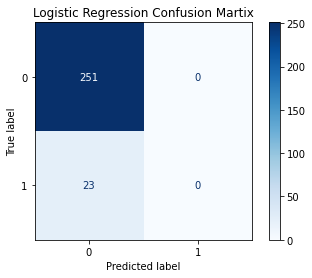

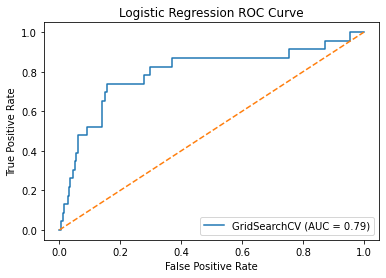

In [116]:
# Produce Metrics

tn, fp, fn, tp = confusion_matrix(y_test,preds_lr).ravel()

plot_confusion_matrix(logreg,X_test,y_test,cmap='Blues',
                      values_format='d')
plt.title('Logistic Regression Confusion Martix')

print('Logistic Regression precision: ',tp / (tp + fp))
print('Logistic Regression sensitivity: ',tp / (tp + fn))
print('Logistic Regression specificity: ',tn / (tn + fp))
print('Logistic Regression accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(logreg,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Logistic Regression ROC Curve')
plt.legend;

Decision Tree precision:  0.6111111111111112
Decision Tree sensitivity:  0.4782608695652174
Decision Tree specificity:  0.9721115537848606
Decision Tree accuracy:  0.9306569343065694


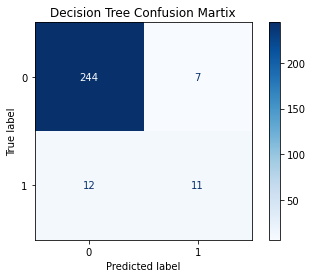

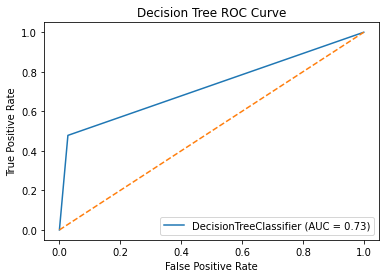

In [117]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_dtc).ravel()

plot_confusion_matrix(dtc,X_test,y_test,cmap='Blues',
                      values_format='d')
plt.title('Decision Tree Confusion Martix')

print('Decision Tree precision: ',tp / (tp + fp))
print('Decision Tree sensitivity: ',tp / (tp + fn))
print('Decision Tree specificity: ',tn / (tn + fp))
print('Decision Tree accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(dtc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Decision Tree ROC Curve')
plt.legend;

KNN precision:  1.0
KNN sensitivity:  0.08695652173913043
KNN specificity:  1.0
KNN accuracy:  0.9233576642335767


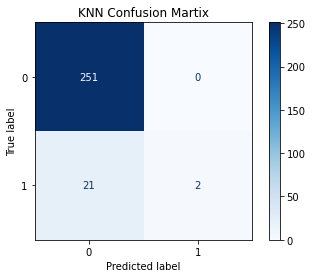

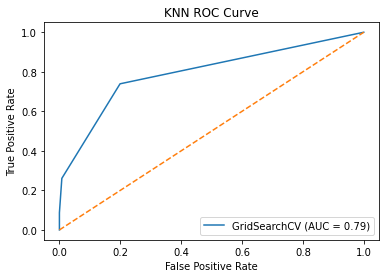

In [118]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_knn).ravel()

plot_confusion_matrix(knn,X_test,y_test,cmap='Blues',
                      values_format='d')
plt.title('KNN Confusion Martix')

print('KNN precision: ',tp / (tp + fp))
print('KNN sensitivity: ',tp / (tp + fn))
print('KNN specificity: ',tn / (tn + fp))
print('KNN accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(knn,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('KNN ROC Curve')
plt.legend;

Random Forest precision:  nan
Random Forest sensitivity:  0.0
Random Forest specificity:  1.0
Random Forest accuracy:  0.916058394160584


/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


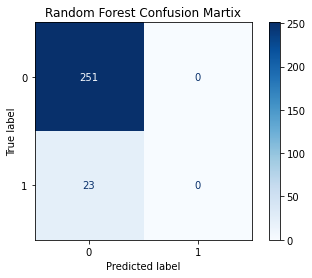

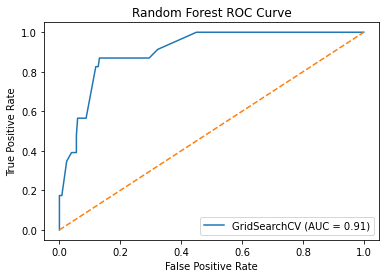

In [119]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_rfc).ravel()

plot_confusion_matrix(rfc,X_test,y_test,cmap='Blues',
                      values_format='d')
plt.title('Random Forest Confusion Martix')

print('Random Forest precision: ',tp / (tp + fp))
print('Random Forest sensitivity: ',tp / (tp + fn))
print('Random Forest specificity: ',tn / (tn + fp))
print('Random Forest accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(rfc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Random Forest ROC Curve')
plt.legend;

AdaBoost precision:  1.0
AdaBoost sensitivity:  0.043478260869565216
AdaBoost specificity:  1.0
AdaBoost accuracy:  0.9197080291970803


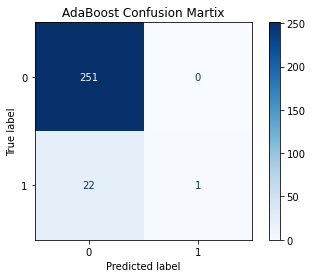

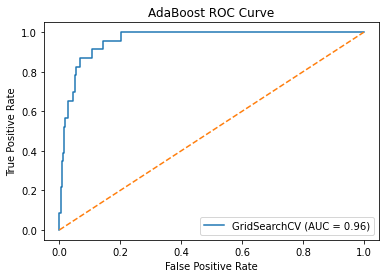

In [120]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_ada).ravel()

plot_confusion_matrix(ada,X_test,y_test,cmap='Blues',
                      values_format='d')
plt.title('AdaBoost Confusion Martix')

print('AdaBoost precision: ',tp / (tp + fp))
print('AdaBoost sensitivity: ',tp / (tp + fn))
print('AdaBoost specificity: ',tn / (tn + fp))
print('AdaBoost accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(ada,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('AdaBoost ROC Curve')
plt.legend;

Bagger precision:  nan
Bagger sensitivity:  0.0
Bagger specificity:  1.0
Bagger accuracy:  0.916058394160584


/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


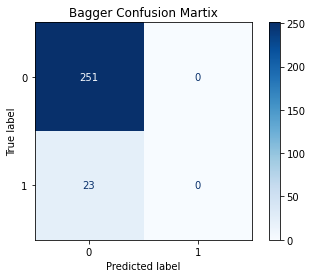

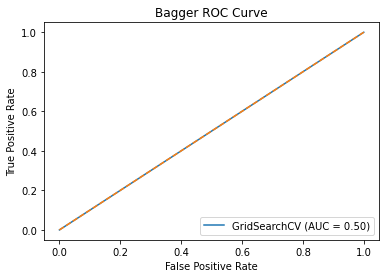

In [121]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_bag).ravel()

plot_confusion_matrix(bag,X_test,y_test,cmap='Blues',
                      values_format='d')
plt.title('Bagger Confusion Martix')

print('Bagger precision: ',tp / (tp + fp))
print('Bagger sensitivity: ',tp / (tp + fn))
print('Bagger specificity: ',tn / (tn + fp))
print('Bagger accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(bag,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Bagger ROC Curve')
plt.legend;

SVC precision:  nan
SVC sensitivity:  0.0
SVC specificity:  1.0
SVC accuracy:  0.916058394160584


/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


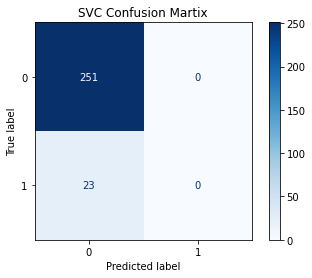

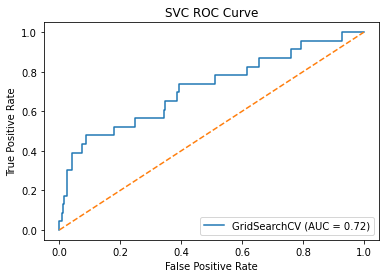

In [122]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_svc).ravel()

plot_confusion_matrix(svc,X_test,y_test,cmap='Blues',
                      values_format='d')
plt.title('SVC Confusion Martix')

print('SVC precision: ',tp / (tp + fp))
print('SVC sensitivity: ',tp / (tp + fn))
print('SVC specificity: ',tn / (tn + fp))
print('SVC accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(svc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('SVC ROC Curve')
plt.legend;

In [124]:
# Restate baseline for reference
y_test.value_counts(normalize=True)

0    0.916058
1    0.083942
Name: accomodation, dtype: float64